In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img

In [4]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [5]:
os.listdir('E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [6]:
len(os.listdir('E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [7]:
train_datagen=ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
train=train_datagen.flow_from_directory(directory='E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                        target_size=(256,256), batch_size=32)
val=val_datagen.flow_from_directory(directory='E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                   target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
t_img, label=train.next()

In [10]:
t_img.shape

(32, 256, 256, 3)

In [11]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        #plt.imshow()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


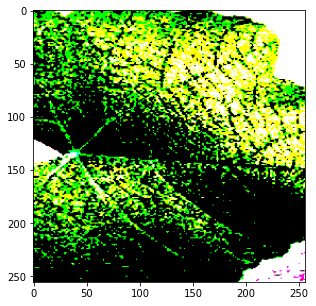

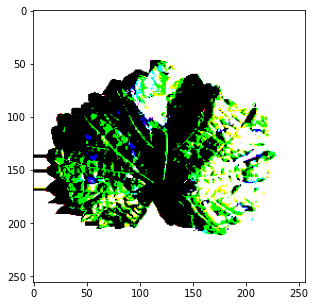

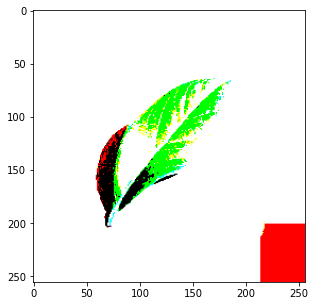

In [12]:
plotImage(t_img[:3], label[:3])

**Building our Own Model**

In [13]:
from tensorflow.keras.layers import Dense, Flatten

In [15]:
from tensorflow.keras.models import Model

In [16]:
from tensorflow.keras.applications.vgg19 import VGG19

In [17]:
base_model=VGG19(input_shape=(256,256,3), include_top=False)

In [18]:
for layer in base_model.layers:
    layer.trainable=False

In [19]:
X = Flatten()(base_model.output)
X = Dense(units=38, activation='softmax')(X)

model=Model(base_model.input, X)

In [20]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [25]:
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=3, verbose=1)

In [26]:
mc=ModelCheckpoint(filepath="best_model2.h5",monitor='val_accuracy', min_delta=0.01,patience=3, verbose=1, save_best_only=True)
cb=[es,mc]

In [27]:
his=model.fit(train,steps_per_epoch=16, epochs=50, verbose=1, callbacks=cb,validation_data=val,validation_steps=16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 24.5084 - accuracy: 0.2051 
Epoch 1: val_accuracy improved from -inf to 0.39062, saving model to best_model2.h5
16/16 [==============================] - 350s 23s/step - loss: 24.5084 - accuracy: 0.2051 - val_loss: 11.7150 - val_accuracy: 0.3906
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.8422 - accuracy: 0.4102 
Epoch 2: val_accuracy improved from 0.39062 to 0.51953, saving model to best_model2.h5
16/16 [==============================] - 355s 23s/step - loss: 14.8422 - accuracy: 0.4102 - val_loss: 11.7604 - val_accuracy: 0.5195
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.6538 - accuracy: 0.5273 
Epoch 3: val_accuracy improved from 0.51953 to 0.67188, saving model to best_model2.h5
16/16 [==============================] - 364s 23s/step - loss: 11.6538 - accuracy: 0.5273 - val_loss: 7.0755 - val_accuracy: 0.6719
Epoch 4/50
16/16 [==============================] - ETA:

In [28]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

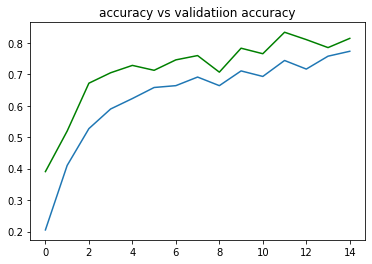

In [29]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='green')
plt.title('accuracy vs validatiion accuracy')
plt.show()

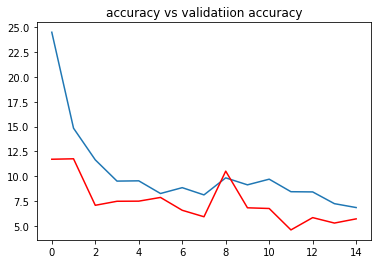

In [30]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('accuracy vs validatiion accuracy')
plt.show()

In [31]:
#load best model

from keras.models import load_model

In [32]:
model=load_model("C:/Users/shami/Downloads/best_model2.h5")

In [33]:
acc=model.evaluate(val)[1]
print(f"Accuracy of the model is {acc*100}%")

550/550 [==============================] - 5713s 10s/step - loss: 5.8169 - accuracy: 0.8042
Accuracy of the model is 80.42340278625488%


In [34]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [35]:
def Prediction(path):
    img=load_img(path, target_size=(256,256))
    i=img_to_array(img)
    im=preprocess_input(i)
    img=np.expand_dims(im,axis=0)
    pred=np.argmax(model.predict(img))

    print(f" The image belongs to {ref[pred]}")

In [36]:
path="E:/NU courses/ML 475/Project/PlantVillage/New Folder/Tomato_Spider_mites_Two_spotted_spider_mite/00c8e9a0-1fb8-434b-8981-25511358ddc9___Com.G_SpM_FL 8717.JPG"
Prediction(path)

1/1 [==============================] - 8s 8s/step
 The image belongs to Tomato___Spider_mites Two-spotted_spider_mite
